In [2]:
from fastai.vision.all import *

In [3]:
import numpy as np
with open('data.npy', 'rb') as file:
    images = np.load(file)

<AxesSubplot:>

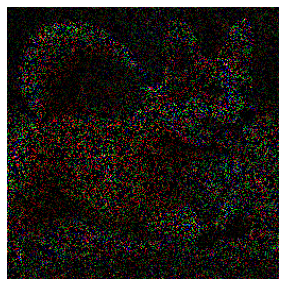

In [4]:
show_image(images[0])

In [5]:
images.shape

(7, 256, 256, 3)

In [6]:
images[0, :5, :5]

array([[[ 0, 34,  0],
        [ 0,  0,  0],
        [ 0, 36,  0],
        [ 0,  0, 30],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0, 30],
        [ 0,  0,  0],
        [ 0,  0, 33]],

       [[37,  0,  0],
        [ 0,  0,  0],
        [ 0, 39,  0],
        [ 0, 41,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [39, 40,  0],
        [ 0, 41,  0],
        [41,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [7]:
path = untar_data(URLs.IMAGENETTE_320)

In [8]:
class ErasedImage(PILBase):
    pass

class TensorErasedImage(TensorImageBase):
    pass

class ImageErase(Transform):
    order = 9
    def __init__(self, thresh=0.85):
        super(Transform, self).__init__()
        self.thresh = thresh
    def encodes(self, x:TensorErasedImage):
        return torch.where((torch.rand(x.shape) > self.thresh).cuda(), x, torch.zeros_like(x))

class ErasedIntToFloatTensor(DisplayedTransform):
    order = 10 #Need to run after PIL transforms on the GPU
    def __init__(self, div=255., div_mask=1): store_attr()
    def encodes(self, o:TensorErasedImage): return o.float().div_(self.div)
    def decodes(self, o:TensorErasedImage): return ((o.clamp(0., 1.) * self.div).long()) if self.div else o

def ErasedImageBlock(cls=ErasedImage):
    "A `TransformBlock` for images of `cls`"
    return TransformBlock(type_tfms=cls.create, batch_tfms=ErasedIntToFloatTensor)

ErasedImage  ._tensor_cls = TensorErasedImage

In [9]:
dblock = DataBlock(blocks=[ErasedImageBlock, ImageBlock],
                splitter=GrandparentSplitter(valid_name='val'),
                   item_tfms=[Resize(256)], batch_tfms=[ImageErase(0.85)]
)

In [10]:
dblock.datasets(get_image_files(path))

(#13394) [(ErasedImage mode=RGB size=463x320, PILImage mode=RGB size=463x320),(ErasedImage mode=RGB size=481x320, PILImage mode=RGB size=481x320),(ErasedImage mode=RGB size=426x320, PILImage mode=RGB size=426x320),(ErasedImage mode=RGB size=457x320, PILImage mode=RGB size=457x320),(ErasedImage mode=RGB size=320x473, PILImage mode=RGB size=320x473),(ErasedImage mode=RGB size=426x320, PILImage mode=RGB size=426x320),(ErasedImage mode=RGB size=320x480, PILImage mode=RGB size=320x480),(ErasedImage mode=RGB size=427x320, PILImage mode=RGB size=427x320),(ErasedImage mode=RGB size=420x320, PILImage mode=RGB size=420x320),(ErasedImage mode=RGB size=320x473, PILImage mode=RGB size=320x473)...]

In [11]:
dls = dblock.dataloaders(get_image_files(path), bs=4)

<AxesSubplot:>

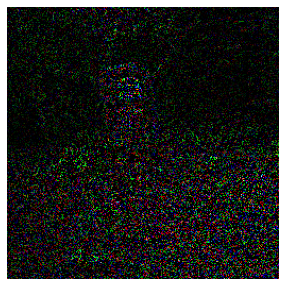

In [12]:
dls.one_batch()[0][0].show()

In [13]:
learn = unet_learner(dls, resnet18, n_out=3, loss_func=MSELossFlat())

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/studio-lab-user/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(valley=9.120108734350652e-05)

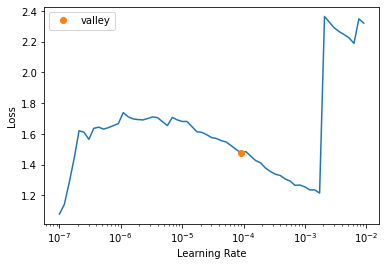

In [14]:
learn.lr_find()

In [15]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,time


KeyboardInterrupt: 

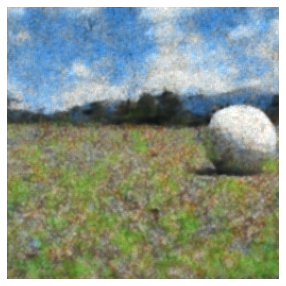

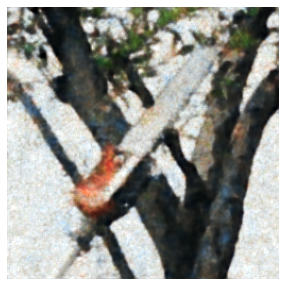

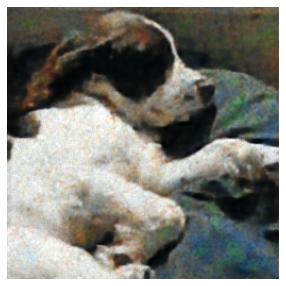

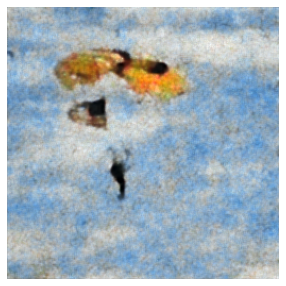

In [16]:
learn.show_results()

In [17]:
learn.save('first')

Path('models/first.pth')

In [32]:
dls.one_batch()[0][0].shape

torch.Size([3, 256, 256])

<AxesSubplot:>

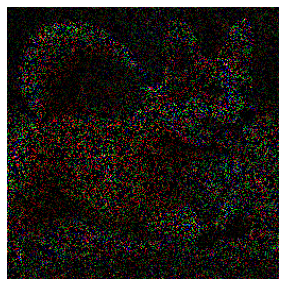

In [35]:
show_image(torch.tensor(images)[0].permute(2,0,1))

In [44]:
xs = torch.tensor(images).permute(0,3,1,2).float().div_(255).cuda()

In [56]:
TensorErasedImage(xs)

TensorErasedImage([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.4353,  ..., 0.0000, 0.4039, 0.4588],
          [0.0000, 0.0000, 0.4824,  ..., 0.0000, 0.0000, 0.3176]],

         [[0.1333, 0.0000, 0.1412,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.3137, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.2314],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.11

In [47]:
preds = learn.model(xs)

In [79]:
preds.shape

torch.Size([7, 3, 256, 256])

In [89]:
preds = (torch.clamp(preds.permute(0, 2, 3, 1), 0, 1)*255).long().cpu().numpy()

In [92]:
with open('answers0.npy', 'wb') as file:
    np.save(file, preds.astype(np.uint8)[0], allow_pickle=False, fix_imports=False)

In [91]:
preds

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [93]:
show_image(torch.tensor(images)[0].permute(2,0,1))

show_image(preds[0].clamp(0, 1))

In [94]:
learn.unfreeze()

[W accumulate_grad.h:184] Warning: grad and param do not obey the gradient layout contract. This is not an error, but may impair performance.
grad.sizes() = [1024, 512, 1, 1], strides() = [512, 1, 1, 1]
param.sizes() = [1024, 512, 1, 1], strides() = [512, 1, 512, 512] (function operator())


SuggestedLRs(valley=0.0003311311302240938)

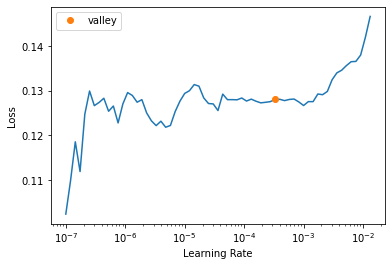

In [95]:
learn.lr_find()

In [96]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,time
0,0.058770,0.053943,08:44


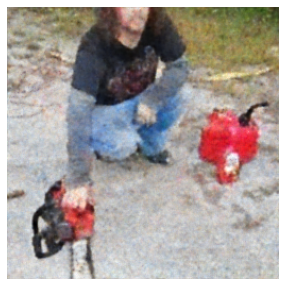

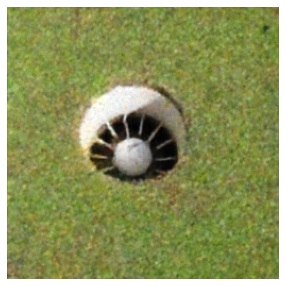

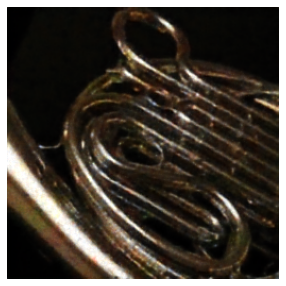

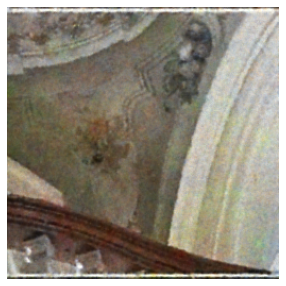

In [97]:
learn.show_results()

In [98]:
preds = learn.model(xs)

<AxesSubplot:>

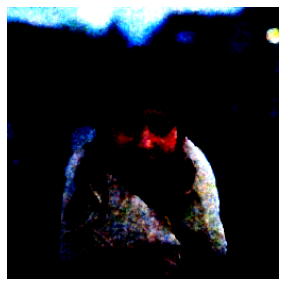

In [106]:
show_image(torch.clamp(preds[4], 0, 1))

In [109]:
dls.decode(TensorImage(preds))

TypeError: isinstance() arg 2 must be a type or tuple of types

In [110]:
learn.save('2')

Path('models/2.pth')